In [8]:
import numpy as np; np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt


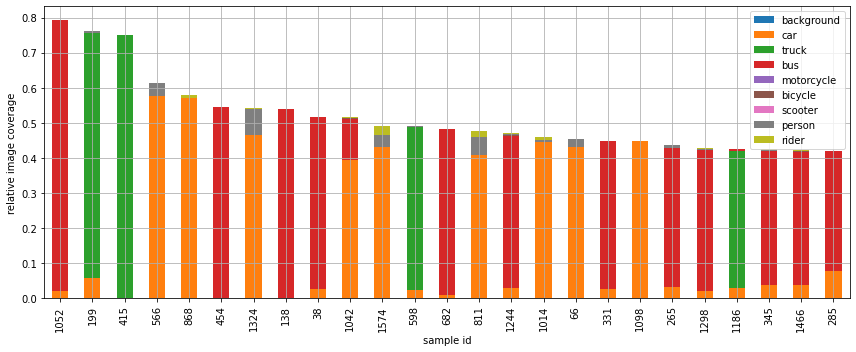

In [67]:
df = pd.read_json('bb_sizes.json')
df = df.sort_values('sum', ascending=False).drop(['sum'], axis=1)
ax = df[:25].plot(figsize=(12,5), kind='bar', stacked=True, grid=True)
ax.set_xlabel("sample id")
ax.set_ylabel("relative image coverage")
ax.legend(loc="upper right", ncol=1)
plt.tight_layout()
plt.savefig("top_25_bb_sizes.pdf")

[('37/1', 247), ('53/5', 299), ('11/1', 302), ('35/1', 331), ('23/1', 390), ('33/1', 419), ('29/1', 419), ('31/1', 444), ('25/1', 456), ('27/1', 500)]


<BarContainer object of 322 artists>

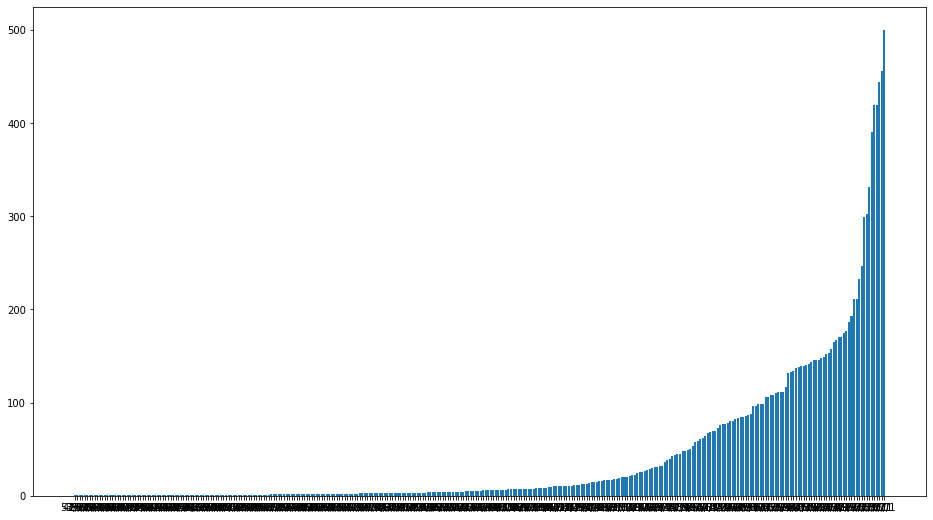

In [22]:

# with open('aspect_ratios.json') as f:
#     aspect_ratios = json.load(f)

# print(len(aspect_ratios))

# common_aspect_ratios = []

# for height in range(1,71, 2):
#     for width in range(1,71, 2):
#         ratio = height / width
#         common_aspect_ratios.append((height/width, f"{height}/{width}"))

# common_aspect_ratios.sort(key=lambda x: x[0])

# def getClosestCommonAspectRatio(ar):
#     return min(common_aspect_ratios, key=lambda x:abs(x[0]-ar))[1]  

# closestCommonAspectRatios = {}
# for aspect_ratio in aspect_ratios:
#     closestCommonAspectRatios.setdefault(
#         getClosestCommonAspectRatio(aspect_ratio),
#         list()
#     ).append(aspect_ratio)

# closestCommonAspectRatios = [(k, len(v)) for k, v in closestCommonAspectRatios.items()]
# closestCommonAspectRatios.sort(key=lambda x: x[1])
print(closestCommonAspectRatios[-10:])

plt.figure(figsize=(16,9))

plt.bar(*zip(*closestCommonAspectRatios))


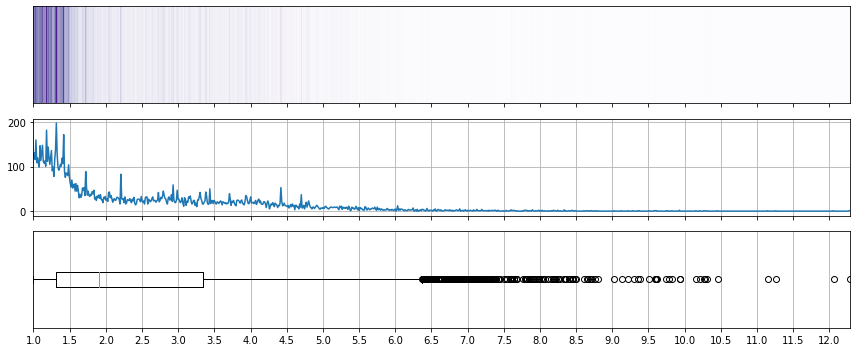

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import json
import numpy as np

with open('bb_dimensions.json') as f:
    dimensions = json.load(f)

aspect_ratios = []
for w, h, _ in dimensions:
    if w > h:
        aspect_ratio = w / h
    else:
        aspect_ratio = h / w

    aspect_ratios.append(aspect_ratio)

def getClosestCommonAspectRatio(ar):
    return min(common_aspect_ratios, key=lambda x:abs(x[0]-ar))[1]

y, x = np.histogram(aspect_ratios, bins=250)
x = x[:-1]

# combined = list(zip(x, y))
# combined.sort(key=lambda x: x[1])
# print(combined[-10:])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(12, 5))
ax1.xaxis.set_major_locator(MultipleLocator(5))


extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax1.imshow(y[np.newaxis,:], cmap="Purples", aspect="auto", extent=extent)
ax1.set_yticks([])
ax1.set_xlim(extent[0], extent[1])
ax1.xaxis.set_major_locator(MultipleLocator(0.5))

ax2.grid()
ax2.plot(x,y)

ax3.grid()
ax3.boxplot(aspect_ratios, vert=False)
ax3.set_yticks([])


plt.tight_layout()
plt.savefig('aspect_ratios.pdf')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (9, 2).

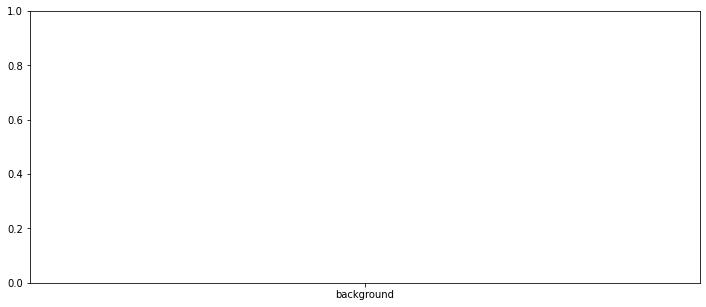

In [25]:
with open('total_class_counters.json') as f:
    data = json.load(f)
    
plt.figure(figsize=(12,5))
plt.bar(*zip(*data.items()))
plt.grid()
plt.tight_layout()
plt.savefig('total_class_counters.pdf')
plt.show()

len before thr=13496
len after thr=12368


<Figure size 360x144 with 0 Axes>

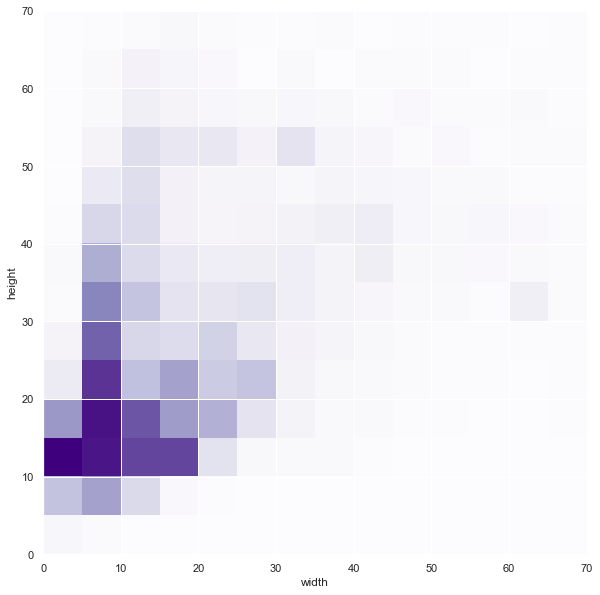

In [75]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


with open('bb_dimensions.json') as f:
    bb_dimensions = json.load(f)

# sort out values larger than threshold
thr = 70
print(f"len before thr={len(bb_dimensions)}")
bb_dimensions = [(x, y) for x, y, _ in bb_dimensions if x <= thr and y <= thr]
print(f"len after thr={len(bb_dimensions)}")
# add artificial threshold datapoints
bb_dimensions.append((0, 0))
bb_dimensions.append((thr, thr))

# unpack list of tuples into two lists
x = [x for x, _ in bb_dimensions]
y = [y for _, y in bb_dimensions]



bb_dimensions, xedges, yedges = np.histogram2d(x, y, bins=14)
ax = fig.add_subplot(title='imshow: square bins')
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(bb_dimensions.T, origin='lower', extent=extent, cmap="Purples")
plt.xlabel("width")
plt.ylabel("height")
plt.savefig("bb_dimensions_heatmap.pdf")

In [51]:


print(a, b)

7 3
